### This script contains the following:

#### 1. Importing libraries 
#### 2. Importing Data
#### 3. Cleaning Data
#### 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.
#### 5. State your hypothesis in a markdown cell within your Jupyter notebook.
#### 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.
#### 7. Split the data into two sets: a training set and a test set.
#### 8.Run a linear regression on the data.
###### 8.1 First, fit the model you created to the training set.
###### 8.2 Then, create a prediction for y on the test set.
#### 9. Create a plot that shows the regression line on the test set.
#### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.
#### 11. Check the model performance statistics—MSE and R2 score.
#### 12. Compare the predicted y values with the actual y values in a dataframe.
#### 13. Include your thoughts on how well the model performed on the test set in a markdown cell.
#### 14. Save dataframe

#### 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

#### 2. Importing data

In [3]:
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design'
df = pd.read_csv(os.path.join(path, '4. Supervised Machine Learning_Regression', 'gun_violence_ex2.csv'))
df.head()

,Unnamed: 0,incident_id,date,day_of_week,day,month,year,address,city_or_county,state,...,n_suspect,location_description,latitude,longitude,state_house_district,state_senate_district,congressional_district,kills_flag,injured_flag,guns_flag
0,0,461105,2013-01-01,Tuesday,1,1,2013,1506 Versailles Avenue and Coursin Street,Mckeesport,Pennsylvania,...,1,Unknown,40.3467,-79.8559,NaN,NaN,14.0,single kill,low injured,NaN
1,1,460726,2013-01-01,Tuesday,1,1,2013,13500 block of Cerise Avenue,Hawthorne,California,...,1,Unknown,33.9090,-118.3330,62.0,35.0,43.0,single kill,low injured,NaN
2,2,478855,2013-01-01,Tuesday,1,1,2013,1776 East 28th Street,Lorain,Ohio,...,2,Cotton Club,41.4455,-82.1377,56.0,13.0,9.0,single kill,low injured,low guns
3,3,478925,2013-01-05,Saturday,5,1,2013,16000 block of East Ithaca Place,Aurora,Colorado,...,1,Unknown,39.6518,-104.8020,40.0,28.0,6.0,low kills,single injured,NaN
4,4,478959,2013-01-07,Monday,7,1,2013,307 Mourning Dove Terrace,Greensboro,North Carolina,...,1,Unknown,36.1140,-79.9569,62.0,27.0,6.0,low kills,low injured,low guns


#### 3. Cleaning Data

In [4]:
pd.set_option('display.max_columns', None)
df = df.drop(columns=['Unnamed: 0'])
df.head()

,incident_id,date,day_of_week,day,month,year,address,city_or_county,state,n_participants,n_guns_involved,n_killed,n_injured,n_adult,n_teen,n_child,n_male,n_female,n_victim,n_suspect,location_description,latitude,longitude,state_house_district,state_senate_district,congressional_district,kills_flag,injured_flag,guns_flag
0,461105,2013-01-01,Tuesday,1,1,2013,1506 Versailles Avenue and Coursin Street,Mckeesport,Pennsylvania,5,NaN,0,4,5,0,0,3,1,4,1,Unknown,40.3467,-79.8559,NaN,NaN,14.0,single kill,low injured,NaN
1,460726,2013-01-01,Tuesday,1,1,2013,13500 block of Cerise Avenue,Hawthorne,California,4,NaN,1,3,4,0,0,1,0,4,1,Unknown,33.9090,-118.3330,62.0,35.0,43.0,single kill,low injured,NaN
2,478855,2013-01-01,Tuesday,1,1,2013,1776 East 28th Street,Lorain,Ohio,5,2.0,1,3,5,0,0,5,0,3,2,Cotton Club,41.4455,-82.1377,56.0,13.0,9.0,single kill,low injured,low guns
3,478925,2013-01-05,Saturday,5,1,2013,16000 block of East Ithaca Place,Aurora,Colorado,4,NaN,4,0,4,0,0,3,1,3,1,Unknown,39.6518,-104.8020,40.0,28.0,6.0,low kills,single injured,NaN
4,478959,2013-01-07,Monday,7,1,2013,307 Mourning Dove Terrace,Greensboro,North Carolina,4,2.0,2,2,3,1,0,2,2,3,1,Unknown,36.1140,-79.9569,62.0,27.0,6.0,low kills,low injured,low guns


In [5]:
df.columns

Index(['incident_id', 'date', 'day_of_week', 'day', 'month', 'year', 'address',
       'city_or_county', 'state', 'n_participants', 'n_guns_involved',
       'n_killed', 'n_injured', 'n_adult', 'n_teen', 'n_child', 'n_male',
       'n_female', 'n_victim', 'n_suspect', 'location_description', 'latitude',
       'longitude', 'state_house_district', 'state_senate_district',
       'congressional_district', 'kills_flag', 'injured_flag', 'guns_flag'],
      dtype='object')

#### 4. Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


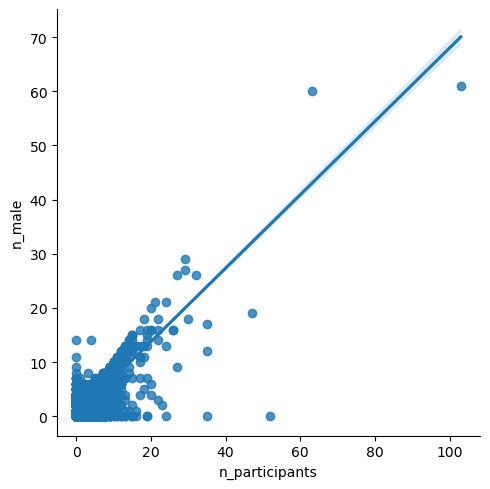

In [4]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
scatterplot = sns.lmplot(data=df, x="n_participants", y="n_male")

In [5]:
path2 = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design\7. Creating Data Dashboards\Github'
scatterplot.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'scatterplot.png'))

#### 5. State your hypothesis in a markdown cell within your Jupyter notebook.

Hypothesis: Most of the participants on a gun incident are males

#### 6. Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable.

In [7]:
x = df['n_participants'].values.reshape(-1,1)
y = df['n_male'].values.reshape(-1,1)

In [8]:
x

array([[5],
       [4],
       [5],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

In [9]:
y

array([[3],
       [1],
       [5],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

#### 7. Split the data into two sets: a training set and a test set.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#### 8.Run a linear regression on the data.
###### 8.1 First, fit the model you created to the training set.

In [11]:
# create linear regression object
regression = LinearRegression()

# fit regression to training set
regression.fit(x_train, y_train)

LinearRegression()

In [12]:
y_predicted_train = regression.predict(x_train)

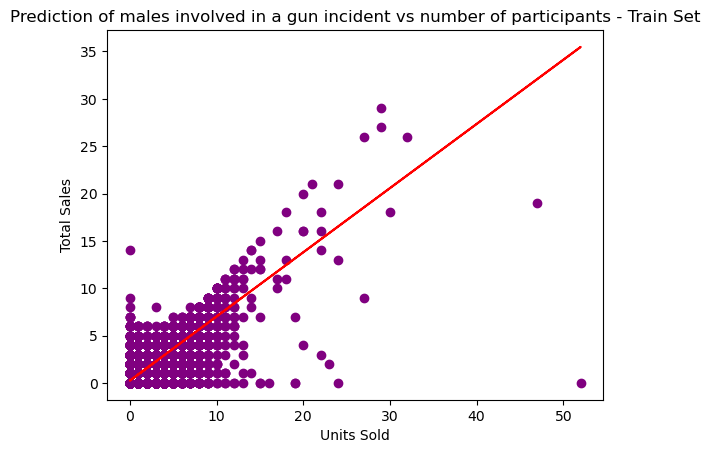

In [13]:
# Visualized the training set results
plot_train = plt
plot_train.scatter(x_train, y_train, color='purple')
plot_train.plot(x_train, y_predicted_train, color='red')
plot_train.title('Prediction of males involved in a gun incident vs number of participants - Train Set')
plot_train.xlabel('Units Sold')
plot_train.ylabel('Total Sales')
plot_train.show()

In [15]:
plot_train.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'plot_train.png'))

<Figure size 640x480 with 0 Axes>

###### 8.2 Then, create a prediction for y on the test set.

In [17]:
y_predicted_test = regression.predict(x_test)

#### 9. Create a plot that shows the regression line on the test set.

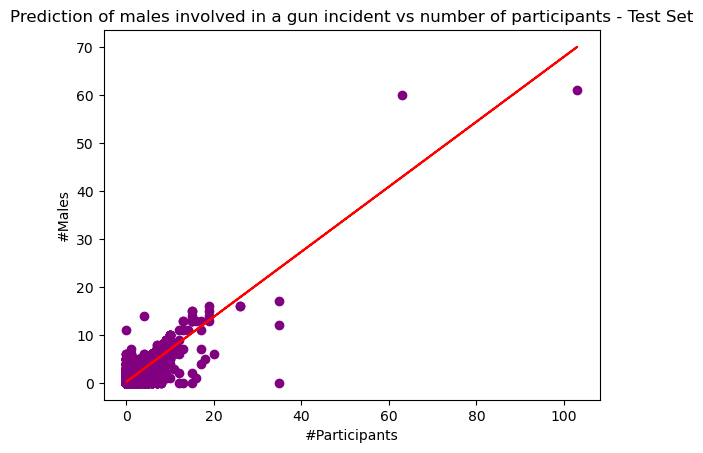

In [18]:
# Visualized the test set results
plot_test = plt
plot_test.scatter(x_test, y_test, color='purple')
plot_test.plot(x_test, y_predicted_test, color='red')
plot_test.title('Prediction of males involved in a gun incident vs number of participants - Test Set')
plot_test.xlabel('#Participants')
plot_test.ylabel('#Males')
plot_test.show()

In [19]:
plot_test.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'plot_test.png'))

<Figure size 640x480 with 0 Axes>

#### 10. Write your own interpretation of how well the line appears to fit the data in a markdown cell.

The 2 plots look different, the prediction line looks similar though

#### 11. Check the model performance statistics—MSE and R2 score.

In [26]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [27]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope:  [[0.67773722]]
Mean squared error:  0.43197823895545656
R2 score:  0.6127795527974231


In [32]:
rmse2 = mean_squared_error(y_test, y_predicted_test)
r22 = r2_score(y_test, y_predicted_test)

In [33]:
print('Slope: ', regression.coef_)
print('Mean squared error: ', rmse2)
print('R2 score: ', r22)

Slope:  [[0.67773722]]
Mean squared error:  0.4309273649960054
R2 score:  0.6402173866203571


#### 12. Compare the predicted y values with the actual y values in a dataframe.

In [38]:
# Created a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted_test.flatten()})
data.head(20)

,Actual,Predicted
0,0,0.912880
1,2,3.623829
2,0,0.912880
3,1,0.912880
4,2,1.590617
5,1,0.912880
6,4,2.946091
7,2,1.590617
8,1,0.912880
9,2,1.590617


#### 13. Include your thoughts on how well the model performed on the test set in a markdown cell.

If we look at the dataframe to compare numbers, they are most of them very close. I think it is a good prediction model.

#### 13. Save dataframe

In [40]:
df.to_csv(os.path.join(path,'4. Supervised Machine Learning_Regression','gun_violence_ex4.csv'))
